In [53]:
#importing core libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#importing essential libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import metrics

#importing Machine learning libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [54]:
#importing and reading dataset

dataset = pd.read_csv('student.csv', sep=',')
dataset['total_grades'] = (dataset['G1']+dataset['G2']+dataset['G3'])/3
dataset=dataset.drop(['G1', 'G2', 'G3'], axis=1)
dataset['total_grades'] = dataset['total_grades'].fillna(dataset['total_grades'].mean())


In [59]:
#defining function for categorizing grades into 3

def marks(total_grades):
    if(total_grades<7):
        return(1)
    elif(total_grades>=7 and total_grades<14):
        return(2)
    elif(total_grades>14):
        return(3)
dataset['grades'] = dataset['total_grades'].apply(marks)
dataset['grades'] = dataset['grades'].fillna(1)
print(dataset.grades)
#del dataset['total_grades']

0      2.0
1      2.0
2      2.0
3      1.0
4      2.0
      ... 
644    2.0
645    3.0
646    2.0
647    2.0
648    2.0
Name: grades, Length: 649, dtype: float64


In [60]:
#Declaration of dependent variable
X=dataset[['school', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'activities', 'higher', 'internet', 'romantic',
       'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'absences']]
       
#Declaration of independent variable
y=dataset['grades'].astype('category')

In [61]:
#spliting data
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, test_size=0.2, random_state=42)

In [62]:
#training the model using linear regression as classifier 
regressor = LogisticRegression()

regressor.fit(X_train, y_train)

/home/el-sunais/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [63]:
#prediction score
r_score = regressor.score(X_test,y_test)

#printing output
print("Regression = ",r_score*100)

Regression =  66.92307692307692


<AxesSubplot:>

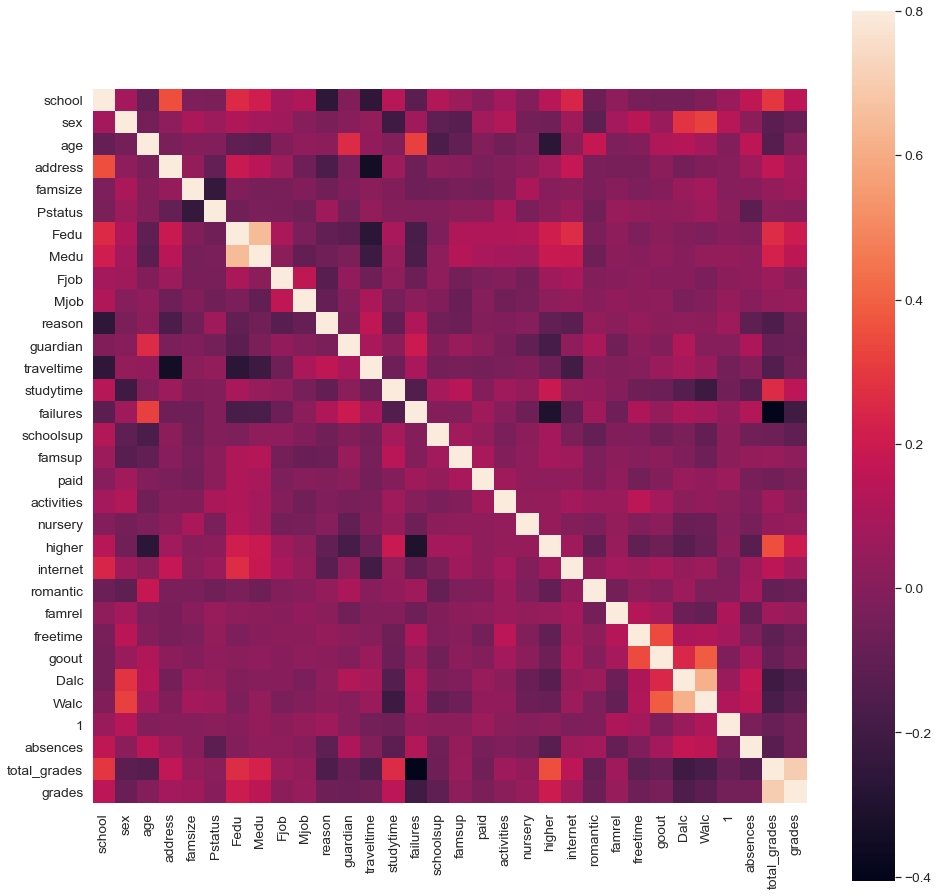

In [64]:
#feature selection by correlation
corrmat = dataset.corr()
f, ax = plt.subplots(figsize=(16, 16))
sns.heatmap(corrmat, vmax=.8, square=True)

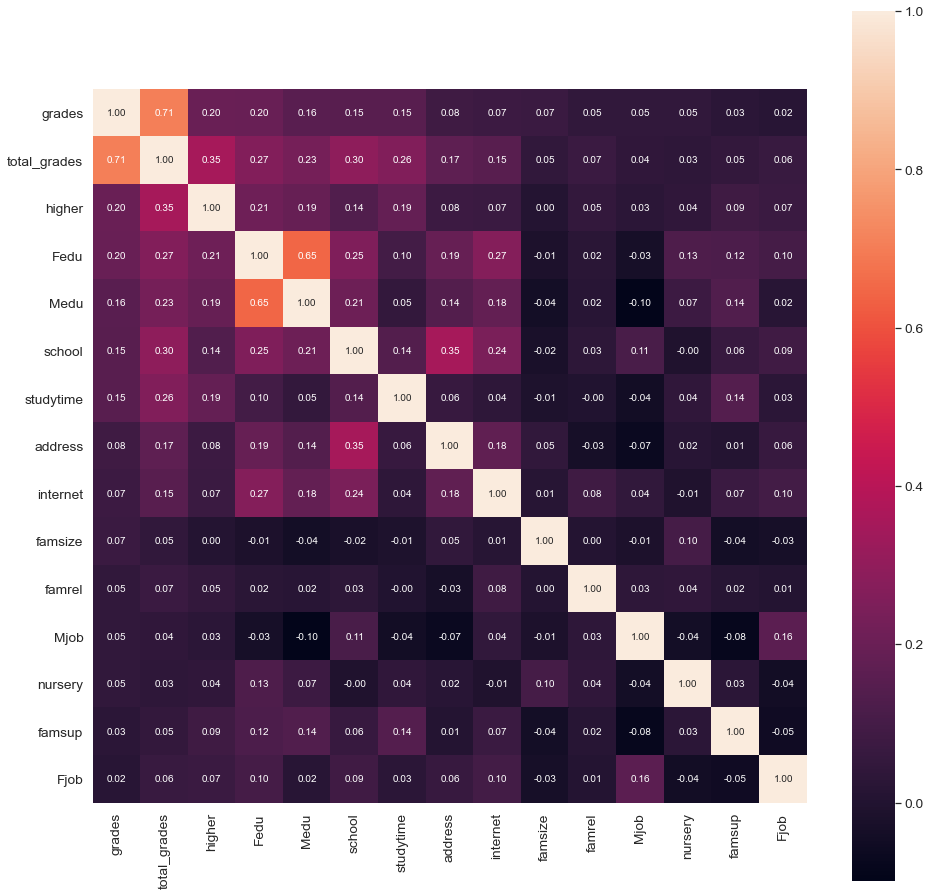

In [65]:
#Best 10 features selected
plt.figure(figsize=(16,16))
columns = corrmat.nlargest(15, 'grades')['grades'].index
correlation_matrix = np.corrcoef(dataset[columns].values.T)
sns.set(font_scale=1.25)
heat_map = sns.heatmap(correlation_matrix, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=columns.values, xticklabels=columns.values)
plt.show()

In [66]:
#Declaration of dependent variable based on feature selection
X=dataset[['Medu', 'Fedu', 'studytime', 'higher', 'school', 'address', 'internet', 
            'studytime', 'nursery', 'famsize', 'famrel']]
       
#Declaration of independent variable
y=dataset['grades'].astype('category')

In [67]:
#spliting data into test & training based on selected features
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, test_size=0.2, random_state=42)

In [68]:
#machine Learning training with 3 different algorithms
logic = LogisticRegression()
vector = SVC()
bayes = GaussianNB()

logic.fit(X_train, y_train)
vector.fit(X_train, y_train)
bayes.fit(X_train, y_train)

/home/el-sunais/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GaussianNB()

In [69]:
#prediction score counts with test data
logic_score = logic.score(X_test, y_test)
vector_score = vector.score(X_test, y_test)
bayes_score = bayes.score(X_test, y_test)

print('---------Prediction Scores------')

print('Logistic prediction confidence is', logic_score*100,'%')
print('Vector prediction confidence is', vector_score*100,'%')
print('Bayes prediction confidence is', bayes_score*100,'%')


---------Prediction Scores------
Logistic prediction confidence is 70.0 %
Vector prediction confidence is 70.0 %
Bayes prediction confidence is 32.30769230769231 %


In [70]:
#performance evaluation
y_log = logic.predict(X_test)
y_vec = vector.predict(X_test)
y_bay = bayes.predict(X_test)

print('---------Classification Report------')

print('Logistic Regression Classfier Report:')
print(classification_report(y_test, y_log))

print('Support Vector Classifier Report:')
print(classification_report(y_test, y_vec))

print('Naive Bayes Classifier Report:')
print(classification_report(y_test, y_bay))

---------Classification Report------
Logistic Regression Classfier Report:
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         7
         2.0       0.70      0.99      0.82        91
         3.0       0.50      0.03      0.06        32

    accuracy                           0.70       130
   macro avg       0.40      0.34      0.29       130
weighted avg       0.62      0.70      0.59       130

Support Vector Classifier Report:
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         7
         2.0       0.70      1.00      0.82        91
         3.0       0.00      0.00      0.00        32

    accuracy                           0.70       130
   macro avg       0.23      0.33      0.27       130
weighted avg       0.49      0.70      0.58       130

Naive Bayes Classifier Report:
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00

/home/el-sunais/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/el-sunais/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/el-sunais/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/el-sunais/anacon